In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Loading Data Modelling Libraries

We will use the popular scikit-learn library to develop our machine learning algorithms. In sklearn, algorithms are called Estimators and implemented in their own classes. For data visualization, we will use the matplotlib and seaborn library. Below are common classes to load.

In [2]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier ,RandomForestClassifier ,GradientBoostingClassifier
from xgboost import XGBClassifier 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import roc_auc_score ,mean_squared_error,accuracy_score,classification_report,roc_curve,confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from scipy.stats.mstats import winsorize
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns',None)
import six
import sys
sys.modules['sklearn.externals.six'] = six

## Data Loading and Cleaning



In [3]:
# accessing to the folder where the file is stored
path = '../input/banking-project-term-deposit/preprocessed_data.csv'

# Load the dataframe
dataframe = pd.read_csv(path)

print('Shape of the data is: ',dataframe.shape)

dataframe.head()



Shape of the data is:  (32950, 14)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,y
0,49,1,1,2,0,0,0,0,7,4,227,4,1,0
1,37,2,1,6,0,0,0,1,7,4,202,2,0,0
2,55,5,1,0,0,0,0,0,3,1,550,1,1,1
3,36,0,1,6,0,1,0,1,6,1,120,2,1,0
4,55,5,0,6,0,0,0,0,4,3,368,2,1,0


#### PREPARING THE TRAIN AND TEST DATA


In [4]:
# Predictors
X = dataframe.iloc[:,:-1]

# Target
y = dataframe.iloc[:,-1]

# Dividing the data into train and test subsets
x_train,x_val,y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=42)


#### FITTING THE MODEL AND PREDICTING THE VALUES

In [5]:
# run Logistic Regression model
model = LogisticRegression()
# fitting the model
model.fit(x_train, y_train)
# predicting the values
y_scores = model.predict(x_val)



#### GETTING THE METRICS TO CHECK OUR MODEL PERFORMANCE

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.93      5798
           1       0.50      0.17      0.26       792

    accuracy                           0.88      6590
   macro avg       0.70      0.57      0.60      6590
weighted avg       0.85      0.88      0.85      6590

ROC_AUC_SCORE is 0.5742166403601381


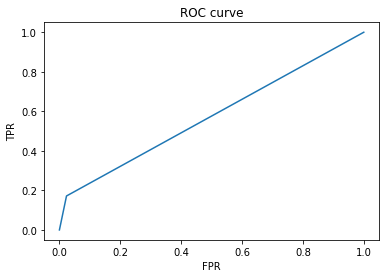

In [6]:

# getting the auc roc curve
auc = roc_auc_score(y_val, y_scores)
print('Classification Report:')
print(classification_report(y_val,y_scores))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_scores)
print('ROC_AUC_SCORE is',roc_auc_score(y_val, y_scores))
    
#fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
    
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

### The above two steps are combined and run in a single cell for all the remaining models respectively

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      5798
           1       0.46      0.46      0.46       792

    accuracy                           0.87      6590
   macro avg       0.69      0.69      0.69      6590
weighted avg       0.87      0.87      0.87      6590

ROC_AUC_SCORE is 0.692229730906861


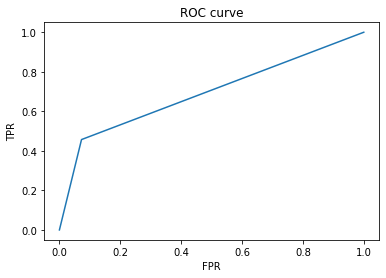

In [7]:
# Run Decision Tree Classifier
model = DecisionTreeClassifier()

model.fit(x_train, y_train)
y_scores = model.predict(x_val)
auc = roc_auc_score(y_val, y_scores)
print('Classification Report:')
print(classification_report(y_val,y_scores))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_scores)
print('ROC_AUC_SCORE is',roc_auc_score(y_val, y_scores))
    
#fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
    
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [8]:
from sklearn import tree
from sklearn.tree import export_graphviz # display the tree within a Jupyter notebook
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from ipywidgets import interactive, IntSlider, FloatSlider, interact
import ipywidgets
from IPython.display import Image
from subprocess import call
import matplotlib.image as mpimg

Decision Tree Training Accuracy: 0.896
Decision Tree Test Accuracy: 0.889


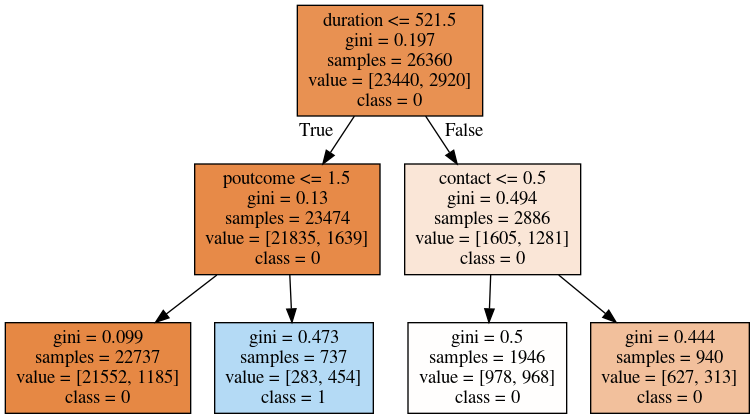

DecisionTreeClassifier(max_depth=2, random_state=0)

In [9]:
@interact
def plot_tree(crit=["gini", "entropy"],
              split=["best", "random"],
              depth=IntSlider(min=1,max=30,value=2, continuous_update=False),
              min_split=IntSlider(min=2,max=5,value=2, continuous_update=False),
              min_leaf=IntSlider(min=1,max=5,value=1, continuous_update=False)):
    
    estimator = DecisionTreeClassifier(random_state=0,
                                       criterion=crit,
                                       splitter = split,
                                       max_depth = depth,
                                       min_samples_split=min_split,
                                       min_samples_leaf=min_leaf)
    estimator.fit(x_train, y_train)
    print('Decision Tree Training Accuracy: {:.3f}'.format(accuracy_score(y_train, estimator.predict(x_train))))
    print('Decision Tree Test Accuracy: {:.3f}'.format(accuracy_score(y_val, estimator.predict(x_val))))

    graph = Source(tree.export_graphviz(estimator,
                                        out_file=None,
                                        feature_names=x_train.columns,
                                        class_names=['0', '1'],
                                        filled = True))
    
    display(Image(data=graph.pipe(format='png')))
    
    return estimator


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      5798
           1       0.63      0.34      0.44       792

    accuracy                           0.90      6590
   macro avg       0.77      0.65      0.69      6590
weighted avg       0.88      0.90      0.88      6590

ROC_AUC_SCORE is 0.654303904864443


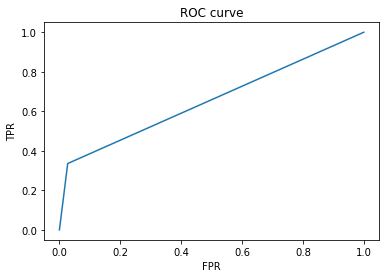

In [10]:
# run Random Forrest Classifier
model = RandomForestClassifier()

model.fit(x_train, y_train)
y_scores = model.predict(x_val)
auc = roc_auc_score(y_val, y_scores)
print('Classification Report:')
print(classification_report(y_val,y_scores))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_scores)
print('ROC_AUC_SCORE is',roc_auc_score(y_val, y_scores))
    
#fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
    
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [11]:
# Selecting 8 number of features
#   selecting models
models = LogisticRegression()
#   using  rfe and selecting 8 features
rfe = RFE(models,8)
#   fitting the model
rfe = rfe.fit(X,y)
#   ranking features
feature_ranking = pd.Series(rfe.ranking_, index=X.columns)
plt.show()
print('Features  to be selected for Logistic Regression model are:')
print(feature_ranking[feature_ranking.values==1].index.tolist())
print('===='*30)



Features  to be selected for Logistic Regression model are:
['job', 'marital', 'education', 'housing', 'contact', 'day_of_week', 'campaign', 'poutcome']


In [12]:
# Selecting 8 number of features
# Random Forrest classifier model
models = RandomForestClassifier()
#   using  rfe and selecting 8 features
rfe = RFE(models,8)
#   fitting the model
rfe = rfe.fit(X,y)
#   ranking features
feature_ranking = pd.Series(rfe.ranking_, index=X.columns)
plt.show()
print('Features  to be selected for Random Forrest Classifier are:')
print(feature_ranking[feature_ranking.values==1].index.tolist())
print('===='*30)



Features  to be selected for Random Forrest Classifier are:
['age', 'job', 'education', 'month', 'day_of_week', 'duration', 'campaign', 'poutcome']


### Feature Selection using Random Forest

Random Forests are often used for feature selection in a data science workflow. This is because the tree based strategies that random forests use, rank the features based on how well they improve the purity of the node. The nodes having a very low impurity get split at the start of the tree while the nodes having a very high impurity get split towards the end of the tree. Hence by pruning the tree after desired amount of splits, we can create a subset of the most important features.

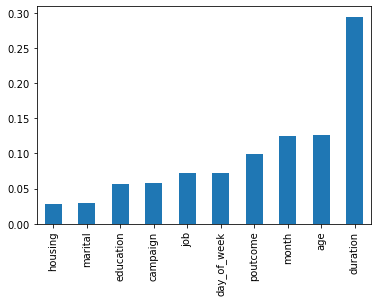

In [13]:
# splitting the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
# selecting the data
rfc = RandomForestClassifier(random_state=42)
# fitting the data
rfc.fit(X_train, y_train)
# predicting the data
y_pred = rfc.predict(X_test)
# feature importances
rfc_importances = pd.Series(rfc.feature_importances_, index=X.columns).sort_values().tail(10)
# plotting bar chart according to feature importance
rfc_importances.plot(kind='bar')
plt.show()

In [14]:
# splitting the data
x_train,x_val,y_train,y_val = train_test_split(X,y, test_size=0.3, random_state=42, stratify=y)
# selecting the classifier
rfc = RandomForestClassifier()
# selecting the parameter
param_grid = { 
'max_features': ['auto', 'sqrt', 'log2'],
'max_depth' : [4,5,6,7,8],
'criterion' :['gini', 'entropy']
             }
# using grid search with respective parameters
grid_search_model = GridSearchCV(rfc, param_grid=param_grid)
# fitting the model
grid_search_model.fit(x_train, y_train)
# printing the best parameters
print('Best Parameters are:',grid_search_model.best_params_)

Best Parameters are: {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt'}


### Applying the best parameters obtained using Grid Search on Random Forest model

In the task below, we fit a random forest model using the best parameters obtained using Grid Search. Since the target is imbalanced, we apply Synthetic Minority Oversampling (SMOTE) for undersampling and oversampling the majority and minority classes in the target respectively. 

__Kindly note that SMOTE should always be applied only on the training data and not on the validation and test data.__

You can try experimenting with and without SMOTE and check for the difference in recall. 

              precision    recall  f1-score   support

           0       0.96      0.76      0.85      8723
           1       0.30      0.77      0.43      1162

    accuracy                           0.76      9885
   macro avg       0.63      0.76      0.64      9885
weighted avg       0.88      0.76      0.80      9885

[[6594 2129]
 [ 271  891]]


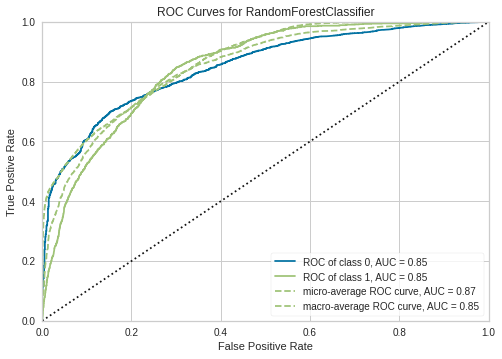

In [15]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from yellowbrick.classifier import roc_auc


# A function to use smote
def grid_search_random_forrest_best(dataframe,target):
    
    # splitting the data
    x_train,x_val,y_train,y_val = train_test_split(dataframe,target, test_size=0.3, random_state=42)
    
    # Applying Smote on train data for dealing with class imbalance
    smote = SMOTE()
    
    X_sm, y_sm =  smote.fit_sample(x_train, y_train)
    
    rfc = RandomForestClassifier(n_estimators=11, max_features='auto', max_depth=8, criterion='entropy',random_state=42)
    
    rfc.fit(X_sm, y_sm)
    y_pred = rfc.predict(x_val)
    print(classification_report(y_val, y_pred))
    print(confusion_matrix(y_val, y_pred))
    visualizer = roc_auc(rfc,X_sm,y_sm,x_val,y_val)


grid_search_random_forrest_best(X,y)

### Applying the grid search function for random forest only on the best features obtained using Random Forest

              precision    recall  f1-score   support

           0       0.96      0.81      0.88      8723
           1       0.35      0.78      0.48      1162

    accuracy                           0.80      9885
   macro avg       0.66      0.79      0.68      9885
weighted avg       0.89      0.80      0.83      9885

[[7038 1685]
 [ 258  904]]


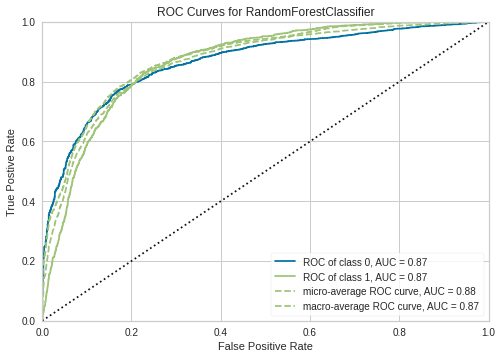

In [16]:
grid_search_random_forrest_best(X[['age', 'job', 'education', 'month', 'day_of_week', 'duration', 'campaign', 'poutcome']],y)

In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import VotingClassifier


# splitting the data  
x_train,x_val,y_train,y_val = train_test_split(X, y, test_size=0.3, random_state=42)
# using smote
smote = SMOTE()
X_sm, y_sm =  smote.fit_sample(x_train, y_train)
# models to use for ensembling  
model1 = RandomForestClassifier()
model3 = GradientBoostingClassifier()
model2 = LogisticRegression()
# fitting the model
model = VotingClassifier(estimators=[('rf', model1), ('lr', model2), ('xgb',model3)], voting='soft')
model.fit(X_sm,y_sm)
# predicting balues and getting the metrics
y_pred = model.predict(x_val)


              precision    recall  f1-score   support

           0       0.95      0.85      0.90      8723
           1       0.38      0.69      0.49      1162

    accuracy                           0.83      9885
   macro avg       0.67      0.77      0.70      9885
weighted avg       0.89      0.83      0.85      9885

[[7441 1282]
 [ 363  799]]


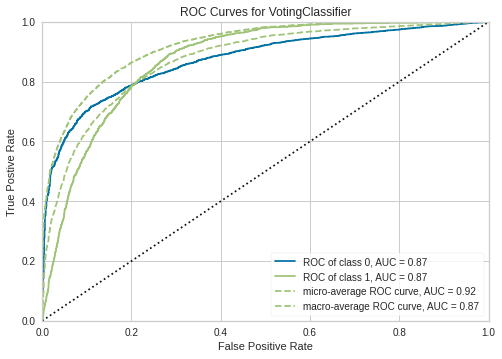

In [18]:
print(classification_report(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))
visualizer = roc_auc(model,X_sm,y_sm,x_val,y_val)

In [19]:
# Preprocessed Test File
test = pd.read_csv('../input/banking-project-term-deposit/new_train.csv')
test.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no


In [20]:
smote = SMOTE()

X_sm, y_sm =  smote.fit_sample(x_train, y_train)


rfc = RandomForestClassifier()
# selecting the parameter
param_grid = { 
'max_features': ['auto', 'sqrt', 'log2'],
'max_depth' : [4,5,6,7,8],
'criterion' :['gini', 'entropy']
             }
# using grid search with respective parameters
grid_search_model = GridSearchCV(rfc, param_grid=param_grid)

# fitting the model
grid_search_model.fit(X_sm, y_sm)
    
# Predict on the preprocessed test file
y_pred = grid_search.predict(test)
    
#prediction = pd.DataFrame(y_pred,columns=['y'])
#submission = pd.concat([Id,prediction['y']],1)

#submission.to_csv('submission.csv',index=False)

NameError: name 'grid_search' is not defined